In [3]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from sklearn.preprocessing import MinMaxScale
from task3_forecasting import generate_future_forecast, plot_forecast
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model as LTSMResults

In [28]:
from task3_forecasting import (
    generate_future_forecast,
    plot_forecast,
    analyze_trend,
    assess_opportunities_and_risks,
    assess_forecast_reliability
)

In [6]:
best_arima_model = ARIMAResults.load("../models/best_arima_model.pkl")
tsla_series = pd.read_csv("../models/tsla_series.csv", parse_dates=True, index_col=0)

C:\Users\Abas\AppData\Local\Temp\ipykernel_13280\1104343026.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tsla_series = pd.read_csv("../models/tsla_series.csv", parse_dates=True, index_col=0)


In [29]:
mean, lower, upper, idx = generate_future_forecast(

    model=best_arima_model,
    model_type="arima",
    steps=252,
    historical_index=tsla_series.index
)

e:\Time-Series-Forecasting-for-Portfolio-Management-Optimization-week-9\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\Time-Series-Forecasting-for-Portfolio-Management-Optimization-week-9\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


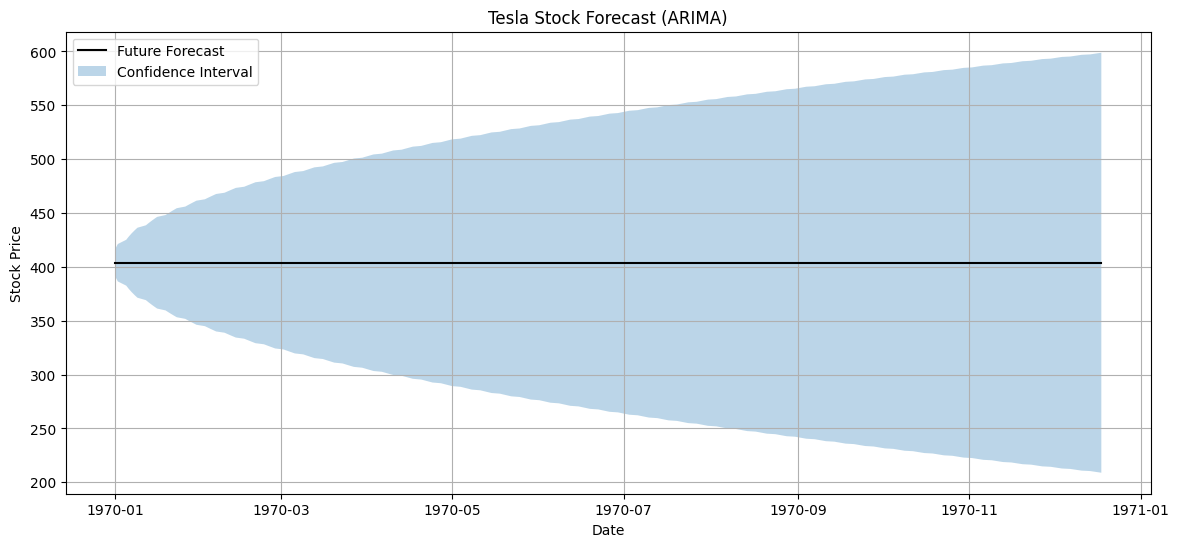

In [38]:
test_predictions = tsla_series
plot_forecast(
    tsla_series,
    test_predictions == tsla_series,
    mean,
    lower,
    upper,
    idx,
    title = "Tesla Stock Forecast (ARIMA)"

)

In [41]:
best_lstm_model = load_model("../models/best_lstm_model.h5")


In [46]:
mean, lower, upper, idx = generate_future_forecast(
    model=best_lstm_model,
    model_type="lstm",
    steps=252,
    historical_index=tsla_series.index,
    scaler=scaler,
    last_window=last_scaled_window,
    lookback=60
)

plot_forecast(
    train_series,
    test_predictions,
    mean,
    lower,
    upper,
    idx,
    "Tesla Stock Forecast (LSTM)"
)


NameError: name 'scaler' is not defined